In [11]:
from qibo.models import Circuit
from qibo import gates
import numpy as np
import random, time
import qibo as qb
from IPython.display import Image
import matplotlib.pyplot as plt

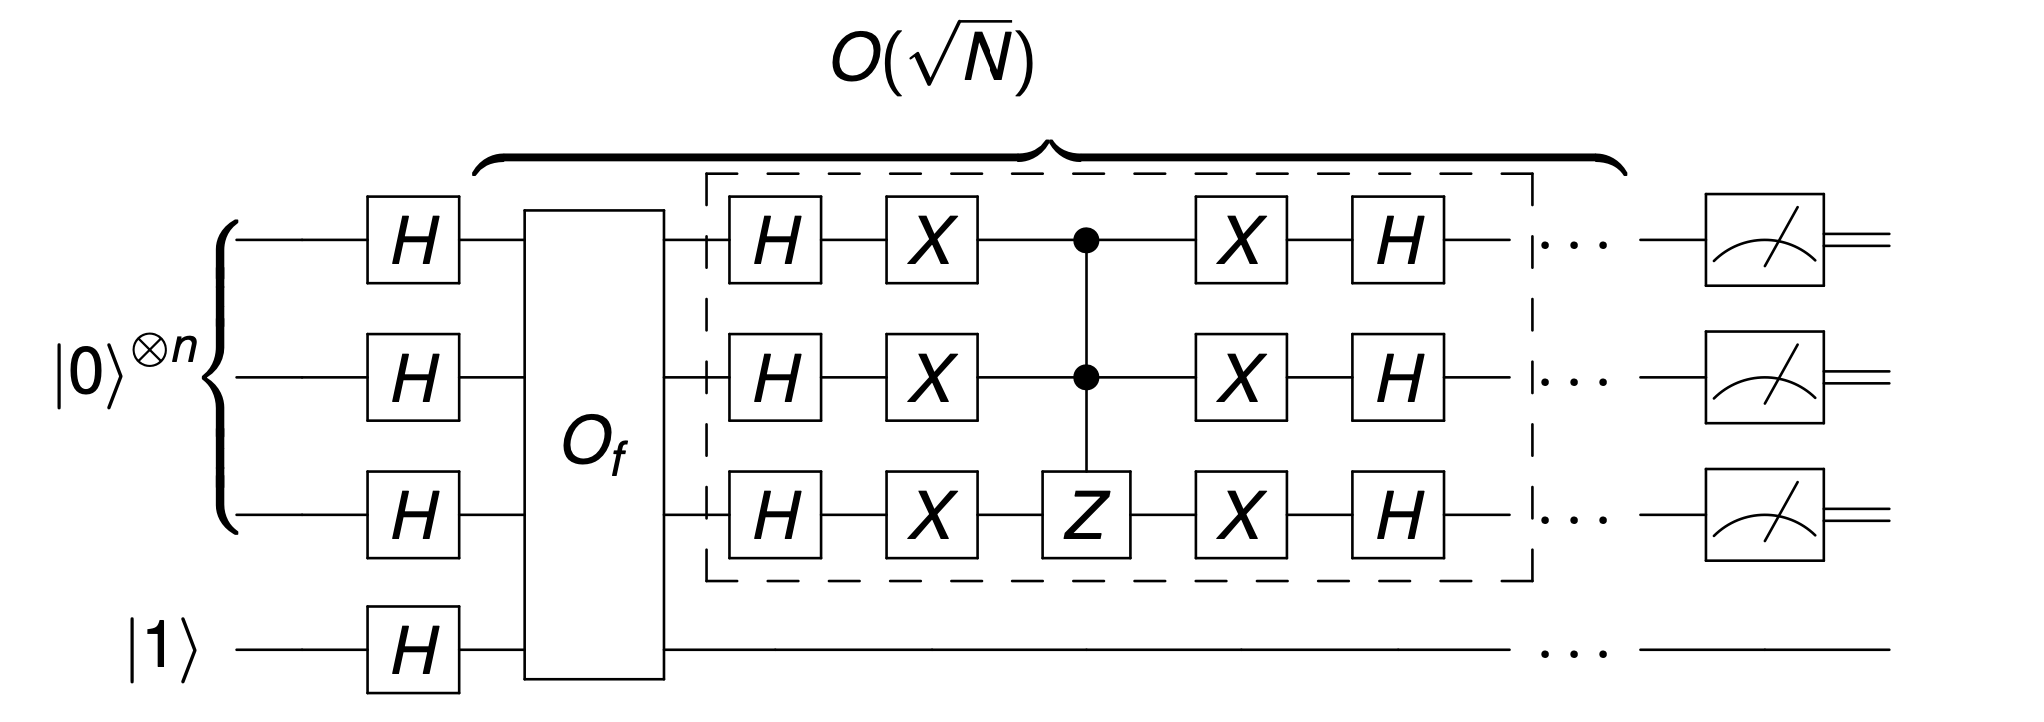

In [2]:
Image("grover.png",width=8*10**2)

In [3]:
#First part of the circuit
def InStates(nqubit):
    
    In=Circuit(nqubit)
    In.add(gates.X(nqubit-1))
    for i in range(nqubit):
        In.add(gates.H(i))
    return In

In [4]:
# Grover’s diffusion operator
def GrovOp(nqubit):
    
    grov=Circuit(nqubit)
    for i in range(nqubit-1):
        grov.add([gates.H(i),gates.X(i)])
    grov.add(gates.Z(nqubit-2).controlled_by(*range(nqubit-2))) 
    for i in range(nqubit-1):
        grov.add([gates.X(i),gates.H(i)])
    return grov

In [5]:
#Oracle
def Oracle(nqubit):
    #multicontrolled X gate 
    orac=Circuit(nqubit)
    orac.add(gates.X(nqubit-1).controlled_by(*range(nqubit-1)))
    return orac

In [6]:
def Grover(nqubit,iterations=1, Nshots=100):
    c=InStates(nqubit)

    for i in range(iterations):  
        c+=Oracle(nqubit)
        c+=GrovOp(nqubit)

    c.add(gates.M(*range(nqubit-1),register_name='InputQubit'))
    result=c(nshots=Nshots)
    return result

When we measure, we will obtain x such that f(x) = 1 with probability depending on:
- The number m of iterations
- The fraction of values x that satisfy the condition

In [15]:
NIt=10
nqubit=4
result=Grover(nqubit,iterations=NIt)
print(result.frequencies())

Counter({'111': 94, '100': 2, '101': 2, '000': 1, '001': 1})
